# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
"I read the data"
veri=pd.read_csv("data.csv")
veri.head(20)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [3]:
"We have to convert objects into 1s and 0s"
veri.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [4]:
veri.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             5
dtype: int64

<AxesSubplot:>

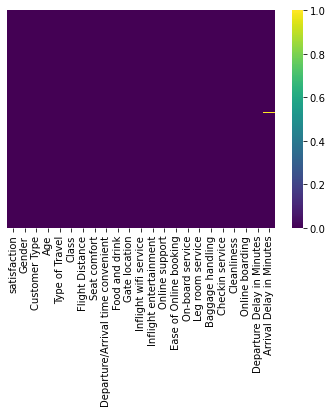

In [5]:
import seaborn as sns
"There are very little missing values. We can fill this with mean."
sns.heatmap(veri.isnull(), yticklabels=False, cmap="viridis")

In [6]:
"I replace missing values with mean. There is no missing values now."
veri.fillna(veri.mean(),inplace=True)
veri.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [7]:
"I converted the satisfaction values into 1 and 0. 1 represents satisfied. 0 represents dissatisfied"
veri.satisfaction.value_counts()

satisfied       906
dissatisfied    829
Name: satisfaction, dtype: int64

In [8]:
"Satisfieds are represented as 1. Dissatisfieds represented as 0."
for i in range(len(veri["satisfaction"])):
    if(veri.iloc[i,0]=="satisfied"):
        veri.iloc[i,0]=1
    elif(veri.iloc[i,0]=="dissatisfied"):
        veri.iloc[i,0]=0

In [9]:
veri.satisfaction.value_counts()

1    906
0    829
Name: satisfaction, dtype: int64

In [10]:
"There are 918 women, 812 men. "
veri.Gender.value_counts()

Female    919
Male      816
Name: Gender, dtype: int64

In [11]:
"I converted all into 1 and 0. 0 is female, 1 is male."
for i in range(len(veri["Gender"])):
    if(veri.iloc[i,1]=="Female"):
        veri.iloc[i,1]=0
    elif(veri.iloc[i,1]=="Male"):
        veri.iloc[i,1]=1

In [12]:
veri.Gender.value_counts()

0    919
1    816
Name: Gender, dtype: int64

In [13]:
"There are 925 loyal, 805 disloyal. "
veri["Customer Type"].value_counts()

Loyal Customer       930
disloyal Customer    805
Name: Customer Type, dtype: int64

In [14]:
"I converted all into 1 and 0. 0 is loyal, 1 is disloyal."
for i in range(len(veri["Customer Type"])):
    if(veri.iloc[i,2]=="Loyal Customer"):
        veri.iloc[i,2]=0
    elif(veri.iloc[i,2]=="disloyal Customer"):
        veri.iloc[i,2]=1

In [15]:
veri["Customer Type"].value_counts()

0    930
1    805
Name: Customer Type, dtype: int64

In [16]:
"There are 883 Business travel, 847 Personal Travel. "
veri["Type of Travel"].value_counts()

Business travel    883
Personal Travel    852
Name: Type of Travel, dtype: int64

In [17]:
"I converted all into 1 and 0. 0 is Business travel, 1 is Personal Travel."
for i in range(len(veri["Type of Travel"])):
    if(veri.iloc[i,4]=="Business travel"):
        veri.iloc[i,4]=0
    elif(veri.iloc[i,4]=="Personal Travel"):
        veri.iloc[i,4]=1

In [18]:
veri["Type of Travel"].value_counts()

0    883
1    852
Name: Type of Travel, dtype: int64

In [19]:
"There are 1113 Eco, 494 Business, 123 Eco plus. "
veri["Class"].value_counts()

Eco         1118
Business     494
Eco Plus     123
Name: Class, dtype: int64

In [20]:
"I converted all into 1,2 and 3. 1 is Eco, 2 is Business, 3 is Eco Plus ."
for i in range(len(veri["Class"])):
    if(veri.iloc[i,5]=="Eco"):
        veri.iloc[i,5]=1
    elif(veri.iloc[i,5]=="Business"):
        veri.iloc[i,5]=2
    elif(veri.iloc[i,5]=="Eco Plus"):
        veri.iloc[i,5]=3

In [21]:
veri["Class"].value_counts()

1    1118
2     494
3     123
Name: Class, dtype: int64

In [22]:
"Now we have done all data preprocessing operations."
veri['Class'] = veri['Class'].astype('int64')
veri['satisfaction'] = veri['satisfaction'].astype('int64')
veri['Customer Type'] = veri['Customer Type'].astype('int64')
veri['Type of Travel'] = veri['Type of Travel'].astype('int64')
veri['Gender'] = veri['Gender'].astype('int64')
veri.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [23]:
# Data Dictionary

In [24]:
veri.dtypes

satisfaction                           int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [25]:
""" I print the correlation table to see relation between variables. 
There are strongly negative relation between customer type and satisfaction.
0 was loyal, 1 was disloyal. We can see most disloyal passengers are unsatisfied

There are strongly positive relation between Type of Travel type and satisfaction.
1 was Eco, 2 was Bussines, 3 was Eco plus. We can see that Most Bussiness and Eco plus passengers are satisfied


There are strongly positive relation between Departure/Arrival time convenient	 type and satisfaction.

"""
veri.corr()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,1.000000,-0.011807,-0.972620,0.122964,0.884226,-0.175273,-0.246160,-0.458418,0.765914,-0.422925,...,0.077673,-0.000727,-0.025859,-0.227136,-0.009671,0.025338,-0.011413,0.038544,-0.129734,-0.136974
Gender,-0.011807,1.000000,-0.017610,0.021110,0.007599,0.009224,0.124416,0.018337,0.035121,0.014690,...,-0.010072,0.062699,0.083935,0.176552,0.080876,0.025307,0.089432,0.031632,0.001940,0.006744
Customer Type,-0.972620,-0.017610,1.000000,-0.120574,-0.913894,0.179715,0.251882,0.445867,-0.731236,0.418645,...,-0.081007,0.000022,0.017131,0.216982,-0.003443,-0.035745,0.000454,-0.039165,0.131543,0.138989
Age,0.122964,0.021110,-0.120574,1.000000,0.091241,0.107744,-0.326922,-0.032495,0.105961,-0.039435,...,0.107100,-0.006570,-0.043645,-0.222502,-0.078940,0.033755,-0.088289,0.063001,0.002273,-0.003950
Type of Travel,0.884226,0.007599,-0.913894,0.091241,1.000000,-0.241841,-0.230375,-0.731916,0.694636,-0.691694,...,0.023014,-0.061553,-0.064699,-0.268151,-0.015997,0.020153,-0.016874,-0.019353,-0.134655,-0.141511
Class,-0.175273,0.009224,0.179715,0.107744,-0.241841,1.000000,0.007959,0.227757,-0.142332,0.215720,...,-0.010668,0.005523,0.085994,0.091022,0.118421,0.089209,0.114851,-0.008179,0.030582,0.016375
Flight Distance,-0.246160,0.124416,0.251882,-0.326922,-0.230375,0.007959,1.000000,0.106471,-0.169849,0.140143,...,-0.090423,0.049864,0.072212,0.305092,0.095555,-0.023781,0.082017,-0.038266,0.106018,0.088752
Seat comfort,-0.458418,0.018337,0.445867,-0.032495,-0.731916,0.227757,0.106471,1.000000,-0.365485,0.917405,...,0.062393,0.120209,0.102086,0.251414,0.033193,0.008700,0.027072,0.086889,0.083775,0.088268
Departure/Arrival time convenient,0.765914,0.035121,-0.731236,0.105961,0.694636,-0.142332,-0.169849,-0.365485,1.000000,-0.334740,...,0.088671,-0.008273,0.089900,-0.125775,0.113532,0.143856,0.065916,0.052229,-0.105262,-0.115048
Food and drink,-0.422925,0.014690,0.418645,-0.039435,-0.691694,0.215720,0.140143,0.917405,-0.334740,1.000000,...,0.069270,0.109780,0.104785,0.227070,0.039096,0.027240,0.028083,0.083493,0.071876,0.072798


In [26]:
"I splited the data into X and y."
X=veri.drop(["satisfaction"],axis=1)
y=veri[["satisfaction"]]

In [27]:
"I splitted the data into train, test and validation sets. Its ratio 70:20:10"
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.125, random_state=1)

In [28]:
"I created an Elbow function to choose best k value."
def Elbow(K):
    #initiating empty list
    test_error = []
   
    for i in K:
        knn = KNN(n_neighbors = i)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_val)
        test_error.append(mse(y_pred,y_val))
        
    manhattan_test_error = []
   
    for i in K:
        knn = KNN(n_neighbors = i, metric="manhattan")
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_val)
        manhattan_test_error.append(mse(y_pred,y_val))
    return test_error, manhattan_test_error

In [29]:
"I defined the k range (1,70) to get more correct results."
k = range(1, 70)
test_error,manhattan_test_error=Elbow(k)

In [30]:
"The min error is 0.14655172413793102, when k=4 , in manhattan distance. So I used this k value while predicting"
print(min(test_error))
print(min(manhattan_test_error))
print("k value:",manhattan_test_error.index(min(manhattan_test_error))+1)

0.21912232289652275
0.14655172413793102
k value: 4


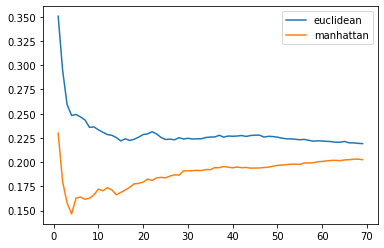

In [31]:
"""I plotted the chart to see and understand error ratios more. 
And we can see Manhattan distance is better than euclidean distance. I choose Manhattan distance and k value as 4"""
plt.plot(k,test_error,label="euclidean")
plt.plot(k,manhattan_test_error,label="manhattan")
plt.legend()
plt.show()

In [32]:
"""Then I choosed the k value as 4 and I made prediction. And I calculated accurach score."""
knn = KNN(n_neighbors =4, metric="manhattan")
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
"""Then, I calculated the accuracy score. Accuary score is 0.77. I think it is not so good but also it is not so bad. 
Maybe, we can get more accurate resulst in logistic regression.
Also you can see that for each column predicted value and real value.
And you can see difference of between them.
"""
accuracy_score(y_test, np.round(abs(prediction))) 
test_df = pd.DataFrame((np.array(y_test)),columns=y.columns)
x_test_df=pd.DataFrame(np.array(X_test),columns=X.columns)
concanted=pd.concat([test_df,x_test_df],axis=1)
predicted_df = pd.DataFrame(np.array(np.round(prediction)),columns=y.columns)
predicted_df["predicted_satisfaction"]=predicted_df["satisfaction"]
predicted_df.drop(['satisfaction'], axis=1,inplace=True)
concanted=pd.concat([predicted_df,concanted],axis=1)
concanted.head(30)

,predicted_satisfaction,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0,0.0,1.0,22.0,0.0,1.0,1789.0,1.0,0.0,...,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,0.0,2.0
1,0.0,0,1.0,1.0,39.0,0.0,2.0,1728.0,1.0,1.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,1.0,30.0,15.0
2,0.0,0,0.0,1.0,35.0,0.0,3.0,1958.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0
3,0.0,0,0.0,1.0,59.0,0.0,2.0,1487.0,1.0,1.0,...,2.0,2.0,3.0,2.0,5.0,4.0,4.0,2.0,11.0,12.0
4,0.0,1,1.0,0.0,39.0,1.0,1.0,3582.0,0.0,4.0,...,2.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,32.0,18.0
5,0.0,0,0.0,1.0,28.0,0.0,2.0,2678.0,1.0,1.0,...,3.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,2.0,0.0
6,1.0,1,1.0,0.0,61.0,1.0,1.0,1055.0,0.0,5.0,...,3.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,0.0,0.0
7,1.0,1,0.0,0.0,9.0,1.0,1.0,2037.0,0.0,3.0,...,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,0.0,1.0
8,0.0,0,1.0,1.0,29.0,0.0,1.0,2504.0,1.0,1.0,...,4.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,11.0,13.0
9,0.0,1,0.0,0.0,28.0,1.0,1.0,2300.0,0.0,4.0,...,1.0,1.0,3.0,2.0,3.0,5.0,5.0,1.0,14.0,12.0


              precision    recall  f1-score   support

           0       0.69      0.95      0.79       166
           1       0.92      0.60      0.73       181

    accuracy                           0.77       347
   macro avg       0.80      0.77      0.76       347
weighted avg       0.81      0.77      0.76       347



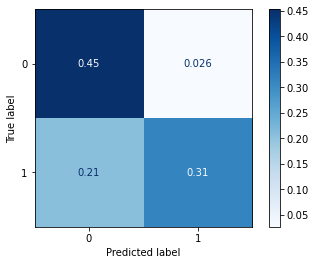

In [34]:
"""Then, I prints the classification report, and Confusion matrix.
approximately %21 of true values predicted as negative.
There is very little value which was 0 but predicted as 1.
Also my f1-score for 0s is 0.79, for 1s is 0.73
"""
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test, np.round(abs(prediction))))
cm3 = confusion_matrix(y_test, np.round(abs(prediction)),normalize="all")
disp = ConfusionMatrixDisplay(cm3).plot(cmap=plt.cm.Blues)

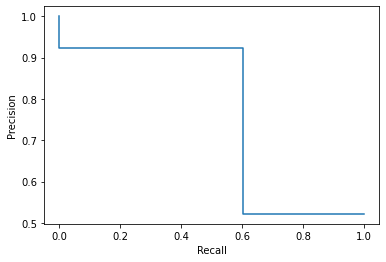

In [35]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
"""I plotted the precision-recall graph to understand how well my model works.
While the area of under the line increasing, the model accuracy increase.
Model can be more better.
"""
precision, recall, _ = precision_recall_curve(y_test, np.round(abs(prediction)))
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
"""
Making predictions and measuring accuracy.
Accuracy is 0.98 that is absolutely perfect.
Logistic regression is the best for this dataset.
"""
predictions = lr.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(accuracy)

0.9827586206896551


In [39]:
"""Then I print the classification_report.
f1 score for 0s and 1s are 0.98 that is also perfect.
"""
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        80
           1       1.00      0.97      0.98        94

    accuracy                           0.98       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174



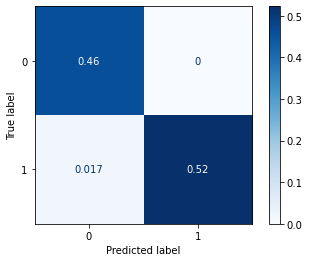

In [40]:
"I printed the confusion matrix. There are very, very little wrong prediction. We can see again that model is perfect."
cm3 = confusion_matrix(y_val, predictions,normalize="all")
disp = ConfusionMatrixDisplay(cm3).plot(cmap=plt.cm.Blues)

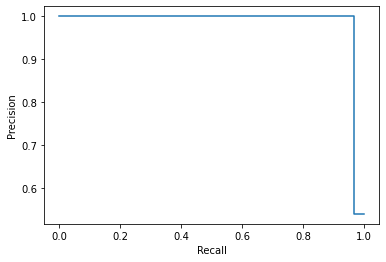

In [41]:
"""Lastly, I printed the recall-precision graph to understand how well my model works. 
I saw that my model is perfect. Logistic regression is better than KNN for this data set.
"""
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_val, predictions)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [42]:
"""Lets get prediction with this model. Lastly it is not as perfect as training accuracy. But still perfect.
Also, you can see that for each row predicted satisfaction and real satisfaction.
"""
lr.fit(X,y)
predictions_test = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions_test)
print("Accuracy:",accuracy)
test_df = pd.DataFrame((np.array(y_test)),columns=y.columns)
x_test_df=pd.DataFrame(np.array(X_test),columns=X.columns)
concanted=pd.concat([test_df,x_test_df],axis=1)
predicted_df = pd.DataFrame({'predicted_satisfaction':predictions_test})
concanted=pd.concat([predicted_df,concanted],axis=1)
concanted.head(30)

Accuracy: 0.962536023054755


,predicted_satisfaction,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0.0,1.0,22.0,0.0,1.0,1789.0,1.0,0.0,...,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,0.0,2.0
1,0,0,1.0,1.0,39.0,0.0,2.0,1728.0,1.0,1.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,1.0,30.0,15.0
2,0,0,0.0,1.0,35.0,0.0,3.0,1958.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0
3,0,0,0.0,1.0,59.0,0.0,2.0,1487.0,1.0,1.0,...,2.0,2.0,3.0,2.0,5.0,4.0,4.0,2.0,11.0,12.0
4,1,1,1.0,0.0,39.0,1.0,1.0,3582.0,0.0,4.0,...,2.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,32.0,18.0
5,0,0,0.0,1.0,28.0,0.0,2.0,2678.0,1.0,1.0,...,3.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,2.0,0.0
6,1,1,1.0,0.0,61.0,1.0,1.0,1055.0,0.0,5.0,...,3.0,3.0,4.0,4.0,5.0,5.0,5.0,3.0,0.0,0.0
7,1,1,0.0,0.0,9.0,1.0,1.0,2037.0,0.0,3.0,...,3.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,0.0,1.0
8,0,0,1.0,1.0,29.0,0.0,1.0,2504.0,1.0,1.0,...,4.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,11.0,13.0
9,1,1,0.0,0.0,28.0,1.0,1.0,2300.0,0.0,4.0,...,1.0,1.0,3.0,2.0,3.0,5.0,5.0,1.0,14.0,12.0


In [43]:
"We can see f1 score and precision and recall values are perfect."
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       166
           1       1.00      0.93      0.96       181

    accuracy                           0.96       347
   macro avg       0.96      0.96      0.96       347
weighted avg       0.97      0.96      0.96       347



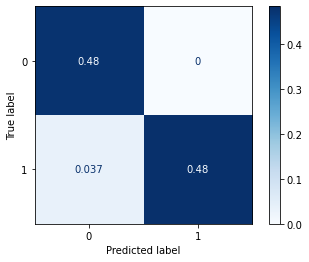

In [44]:
"""You can see that there are very, very little wrong answer."""
cm3 = confusion_matrix(y_test, predictions_test,normalize="all")
disp = ConfusionMatrixDisplay(cm3).plot(cmap=plt.cm.Blues)

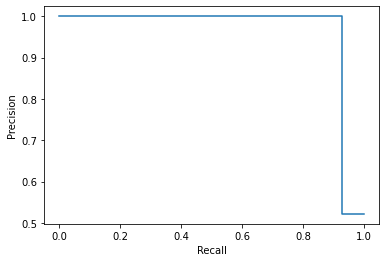

In [45]:
"We can see area of under the line are very big. So this model is perfect"
precision, recall, _ = precision_recall_curve(y_test, predictions_test)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()